In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.dates as mdates
from pandas_profiling import ProfileReport
plt.style.use('fivethirtyeight')

In [2]:
df = pd.read_csv('~/Downloads/jira.csv')

/usr/local/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3145: DtypeWarning: Columns (27,50,51,52,53,54,55,56,71,72,73,74,75,78,80,82,83,84,85,86,87,88,89,90,94,95,96,97,98,104,105,106,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,199,257,272,298,299,304,353,354,355,356,357,358,359,360,361,362,363,364,365,366,367) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [5]:
df['createdDate'] = pd.to_datetime(df['Created'], format="%d/%b/%y %H:%M %p")

In [6]:
#profile = ProfileReport(df, title="Pandas Profiling Report")

In [7]:
df.groupby('Issue Type').size()

Issue Type
Bug            1092
Epic            144
Improvement     197
Story           692
Sub-task         85
Task            789
dtype: int64

# Display all the columns

In [9]:
pd.set_option('display.max_columns', 100)

In [10]:
df.head()

,Summary,Issue key,Issue id,Parent id,Issue Type,Status,Project key,Project name,Project type,Project lead,Project description,Project url,Priority,Resolution,Assignee,Reporter,Creator,Created,Updated,Last Viewed,Resolved,Affects Version/s,Affects Version/s.1,Affects Version/s.2,Fix Version/s,Fix Version/s.1,Fix Version/s.2,Fix Version/s.3,Component/s,Due Date,Votes,Labels,Labels.1,Labels.2,Labels.3,Labels.4,Labels.5,Description,Environment,Watchers,Watchers.1,Watchers.2,Watchers.3,Watchers.4,Watchers.5,Watchers.6,Watchers.7,Watchers.8,Watchers.9,Watchers.10,...,Custom field (Verification),Custom field (Version),Custom field (Vuln # Critical),Custom field (Vuln # High),Custom field (Vuln # Low),Custom field (Vuln # Medium),Custom field (Vulnerability Residual Risk),Custom field (Vulnerability type),Custom field (WAF Group),Custom field (test kamil 2),Comment,Comment.1,Comment.2,Comment.3,Comment.4,Comment.5,Comment.6,Comment.7,Comment.8,Comment.9,Comment.10,Comment.11,Comment.12,Comment.13,Comment.14,Comment.15,Comment.16,Comment.17,Comment.18,Comment.19,Comment.20,Comment.21,Comment.22,Comment.23,Comment.24,Comment.25,Comment.26,Comment.27,Comment.28,Comment.29,Comment.30,Comment.31,Comment.32,Comment.33,Comment.34,Comment.35,Comment.36,Comment.37,Comment.38,createdDate
0,GA tagging | Adding MyRYRid data to CC,TP-19936,1340108,NaN,Task,In Progress,TP,Trip Planner,software,Bochenekr,NaN,NaN,Medium,NaN,moreirasantosa,Rochemgl,Rochemgl,22/Oct/20 4:16 PM,23/Oct/20 9:07 AM,23/Oct/20 5:00 PM,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,GA_Tagging,google-analytics-migration,NaN,NaN,NaN,NaN,Cd7 was removed from the CC due to GDPR but w...,NaN,Rochemgl,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020-10-22 04:16:00
1,"Check-in Bags (d) | PB ""Purchased"" | multipax ...",TP-19935,1340095,NaN,Story,Backlog,TP,Trip Planner,software,Bochenekr,NaN,NaN,Medium,NaN,cortesp,cortesp,cortesp,22/Oct/20 3:44 PM,22/Oct/20 3:52 PM,23/Oct/20 5:00 PM,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,Check-in_Bags_Release3,NaN,NaN,NaN,NaN,NaN,+1. *Narrative*+\r\n\r\nAs a user that has pur...,NaN,cortesp,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020-10-22 03:44:00
2,Home Page (d) | Deal Sheat Banner supporting v...,TP-19934,1340071,NaN,Story,Backlog,TP,Trip Planner,software,Bochenekr,NaN,NaN,Medium,NaN,Bochenekr,queirozf,queirozf,22/Oct/20 2:45 PM,23/Oct/20 11:11 AM,23/Oct/20 2:42 PM,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,h3. *1. Narrative*\r\n\r\n*As a user* that is ...,NaN,queirozf,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,23/Oct/20 11:11 AM;queirozf;FE - 5\r\n\r\nQA - 2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020-10-22 02:45:00
3,Car Hire Pillar | Pass in Promo code - Post Bo...,TP-19933,1340065,NaN,Story,Backlog,TP,Trip Planner,software,Bochenekr,NaN,NaN,Medium,NaN,wojcikk,thorntono,cortesp,22/Oct/20 2:34 PM,22/Oct/20 2:35 PM,23/Oct/20 5:00 PM,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,tov-pillars-project,NaN,NaN,NaN,NaN,NaN,We would like to pass in a promo code to the c...,NaN,cortesp,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020-10-22 02:34:00
4,Car Hire Pillar | Pass in Promo code - Booking...,TP-19932,1340064,NaN,Story,Backlog,TP,Trip Planner,software,Bochenekr,NaN,NaN,Medium,NaN,wojcikk,thornton

# GA tasks

In [7]:
ga =  df.loc[df['Summary'].str.contains('GA') | df['Reporter'].str.contains('sanchezi') | df['Reporter'].str.contains('Rochemgl') | df['Reporter'].str.contains('ricel')]

In [8]:
ga.count()

Summary        344
Issue key      344
Issue id       344
Parent id        1
Issue Type     344
              ... 
Comment.35       0
Comment.36       0
Comment.37       0
Comment.38       0
createdDate    344
Length: 369, dtype: int64

# All other

In [26]:
df.rename(columns={'Custom field (Scrum Team)': 'ScrumTeam'}, inplace=True)

all_other = df.loc[~df['Summary'].str.contains('GA') & ~df['Reporter'].str.contains('sanchezi') & ~df['Reporter'].str.contains('Rochemgl') & ~df['Reporter'].str.contains('ricel')]
all_other = all_other.loc[(all_other['ScrumTeam'].str.contains('dotrez') == False) & (all_other['ScrumTeam'].str.contains('dotREZ Services') == False) & (all_other['ScrumTeam'].str.contains('Payment Services') == False) & (all_other['ScrumTeam'].str.contains('Facade Services') == False)]

In [27]:
all_other.count()

Summary        2244
Issue key      2244
Issue id       2244
Parent id        61
Issue Type     2244
               ... 
Comment.35        1
Comment.36        1
Comment.37        1
Comment.38        1
createdDate    2244
Length: 369, dtype: int64

([<matplotlib.patches.Wedge at 0x12b22d880>,
 [Text(1.0054784839011015, 0.44610875177689857, 'GA'),
  Text(-1.0054784630172426, -0.4461087988467429, 'Rest')],
 [Text(0.5484428094006008, 0.24333204642376283, '13.3%'),
  Text(-0.548442798009405, -0.24333207209822338, '86.7%')])

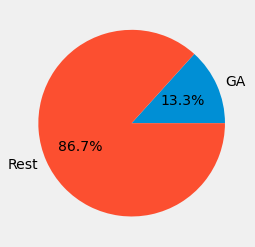

In [28]:
plt.pie([ga.count()[0], all_other.count()[0]], labels=["GA", "Rest"], autopct='%1.1f%%')

# What's the issue type distribution

<AxesSubplot:ylabel='Issue Type'>

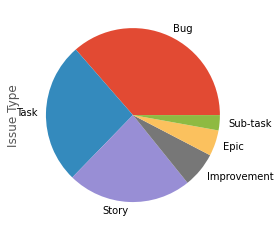

In [43]:
df['Issue Type'].value_counts().plot(y='Issue Type', kind="pie")

In [111]:
df.loc[df['Issue Type'].str.contains('Bug')].groupby('Priority').size()

Priority
Critical     39
High        262
Low         195
Medium      596
dtype: int64

# Issue type timeseries

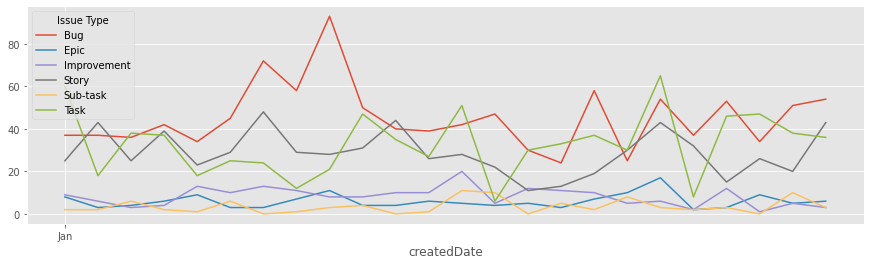

In [135]:
bins = pd.cut(df.createdDate, bins=24)
plot = df.groupby([bins,'Issue Type']).size().unstack().plot(figsize=(15,4))
plot.xaxis.set_major_locator(mdates.MonthLocator(interval=1))
plot.xaxis.set_major_formatter(mdates.DateFormatter('%b'))

# Bugs raised timeseries

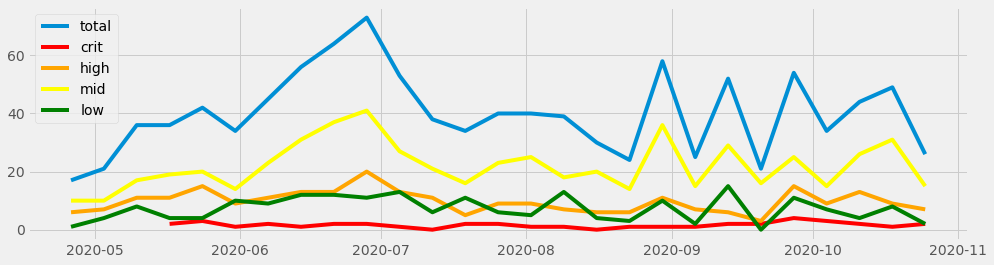

In [227]:
fig,ax = plt.subplots(figsize=(15,4))
bugs = df.loc[df['Issue Type'].str.contains('Bug')].reset_index()

critbugs = bugs[bugs['Priority'] == 'Critical'].groupby(bugs.createdDate).size().resample('W').size().sort_index(ascending=False)
highbugs = bugs[bugs['Priority'] == 'High'].groupby(bugs.createdDate).size().resample('W').size().sort_index(ascending=False)
midbugs = bugs[bugs['Priority'] == 'Medium'].groupby(bugs.createdDate).size().resample('W').size().sort_index(ascending=False)
lowbugs = bugs[bugs['Priority'] == 'Low'].groupby(bugs.createdDate).size().resample('W').size().sort_index(ascending=False)


totalbugs = bugs.groupby(bugs.createdDate).size().resample('W').size().sort_index(ascending=False)

ax.plot(totalbugs, label="total")
ax.plot(critbugs, color="red", label="crit")
ax.plot(highbugs, color="orange", label="high")
ax.plot(midbugs, color="yellow", label="mid")
ax.plot(lowbugs, color="green", label="low")
ax.legend(loc="best")


# Bugs in Jun/July timeseries per team

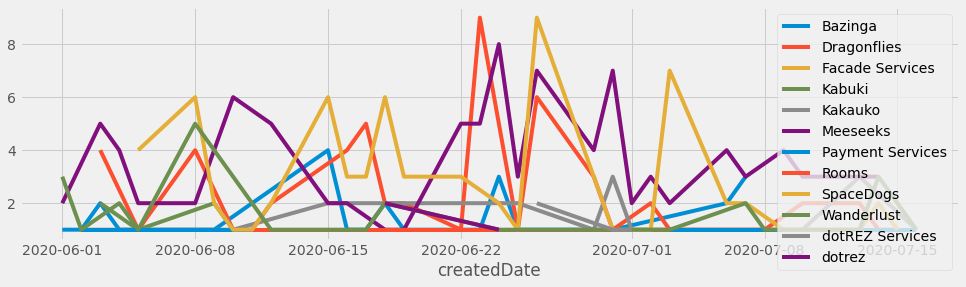

In [405]:
bugs = df.loc[df['Issue Type'].str.contains('Bug')].reset_index()
bugs.rename(columns={'Custom field (Scrum Team)': 'ScrumTeam'}, inplace=True)

slice = bugs[(bugs['createdDate']>pd.Timestamp(2020,6,1)) & (bugs['createdDate']<pd.Timestamp(2020,7,17))]
gslice = slice.groupby([slice.createdDate.dt.date, 'ScrumTeam']).size()
a = gslice.reset_index(level=1)
a.rename(columns={0: 'Bugs'}, inplace=True)
fig, ax = plt.subplots(figsize=(15,4))

for team in a.groupby('ScrumTeam'):
    filtered = a.loc[a['ScrumTeam'] == team[0]]
    filtered.plot(ax=ax, y="Bugs", label=team[0])#gslice.groupby(['ScrumTeam', pd.Grouper(freq='W', level=0)]).size().plot(kind="bar", x="createdDate", y="")

# Bugs vs Tasks breakdown x team

In [407]:
btt = df.rename(columns={'Custom field (Scrum Team)': 'ScrumTeam'})
def groupIssues(x):
    if x == 'Bug':
        return x
    else:
        return 'Task'
btt['Issue Type'] = btt['Issue Type'].apply(groupIssues)
btt.groupby(['ScrumTeam', 'Issue Type']).size()

ScrumTeam         Issue Type
Bazinga           Bug            48
                  Task           54
Dragonflies       Bug           128
                  Task          243
Facade Services   Bug             8
                  Task            2
Kabuki            Bug            16
                  Task           39
Kakauko           Bug           120
                  Task          235
Meeseeks          Bug           261
                  Task          338
Payment Services  Bug            19
                  Task           51
Rooms             Bug            14
                  Task           37
Scrumdogs         Task            1
Space Invaders    Task            1
SpaceDogs         Bug           260
                  Task          451
Wanderlust        Bug           133
                  Task          175
dotREZ SRE        Bug             1
dotREZ Services   Bug            13
                  Task            6
dotrez            Bug             5
dtype: int64

## Weekly bugs ratio  x team?

In [ ]:
##